In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/business-analyst-jobs/BusinessAnalyst.csv


### The motivation behind this project is that I am beginning to apply for Business Analyst jobs. What better way to practice EDA skills and gain some insight into the world of Business Analyst job seeking, than to make a project about it

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
jobs_data=pd.read_csv('/kaggle/input/business-analyst-jobs/BusinessAnalyst.csv')
jobs_data.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [5]:
jobs_data.tail()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,NaN,NaN
4091,Financial Analyst II - Baptist,$66K-$114K (Glassdoor est.),Job Summary\n\nThis unique analyst position re...,2.7,Baptist Medical Center Jacksonville\n2.7,"Jacksonville, FL","Jacksonville, FL",5001 to 10000 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,NaN,NaN


### If we observe the output of head() and tail(), we can see that there is a mismatch in the row and column values. The row values seem to have shifted leftwards. Next, we will try to rectify that.

In [6]:
# To figure out where does the mismatch start
mismatch_num=0
for i in jobs_data['Unnamed: 0']:
    if not i.isdigit():
        mismatch_num+=1
mismatch_num

400

### STEPS TAKEN
1. Made a new dataframe from the mismatched rows. 
2. Since the row values have shifted leftwards by two indexes, last two columns in this dataframe will be empty. Hence, dropping them. 
3. In this dataframe, ['Unnamed: 0','index'] contain values for ['Job Title', 'Salary Estimate']. So, renaming the columns in the mini dataset and setting them to appropriate columns from original dataset
4.  Further dropping first two columns from the original dataset and the mismatched rows also.
5. Then appending the fixed rows back to dataset

In [7]:
jobsFix=jobs_data.iloc[-mismatch_num:,:]
jobsFix.drop(['Competitors','Easy Apply'], axis=1, inplace= True)
jobsFix.columns=jobs_data.columns[2:]

jobs_data.drop(['Unnamed: 0', 'index'],axis=1, inplace = True)
jobs_data.drop(jobs_data.index[-mismatch_num:],axis = 0, inplace = True)
jobs_data=jobs_data.append(jobsFix)
jobs_data.tail()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1
4091,Financial Analyst II - Baptist,$66K-$114K (Glassdoor est.),Job Summary\n\nThis unique analyst position re...,2.7,Baptist Medical Center Jacksonville\n2.7,"Jacksonville, FL","Jacksonville, FL",5001 to 10000 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1


In [8]:
jobs_data.describe()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092,4092
unique,2066,151,3889,36,2207,215,592,9,178,15,101,26,14,486,2
top,Business Analyst,$48K-$87K (Glassdoor est.),Organization: Accenture Federal Services\n\nLo...,-1.0,"Staffigo Technical Services, LLC\n5.0","Jacksonville, FL","New York, NY",10000+ employees,-1,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
freq,518,60,8,318,178,392,249,847,1066,2260,659,1110,948,2987,3958


### Next, we are aware that salary is a big factor when it comes to job seeking. But in the given dataset, the salary column is an str object that needs to be transformed to make it usable

1. We are splitting the Salary Estimate column into Min and Max Salary columns
2. Next, we are replacing K of the original column into the equivalent monetary equivalent
3. Also, creating an Average Salary column which will be extremely handy when comparing various categories

In [9]:
jobs_data[['MinSalary','MaxSalary']]=jobs_data['Salary Estimate'].str.split(r"[\D]+",expand=True).drop([0,3], axis =1)
jobs_data['MinSalary']=jobs_data['MinSalary'].apply(lambda x : int(x) * 1000)
jobs_data['MaxSalary']=jobs_data['MaxSalary'].apply(lambda x : int(x) * 1000)
jobs_data['AvgSalary']=(jobs_data['MinSalary']+jobs_data['MaxSalary'])/2
jobs_data.drop(['Salary Estimate'],axis=1, inplace = True)

In [10]:
jobs_data['Rating'] = jobs_data['Rating'].astype(float)
jobs_data[['StateName','State']] = jobs_data['Location'].str.split(', ',expand=True).drop([2],axis=1)
jobs_data['State'] = jobs_data['State'].str.replace('Los Angeles','CA')

In [11]:
jobs_data.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary,AvgSalary,StateName,State
0,Business Analyst - Clinical & Logistics Platform,Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,56000,102000,79000.0,New York,NY
1,Business Analyst,We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,56000,102000,79000.0,New York,NY
2,Data Analyst,"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,56000,102000,79000.0,Florham Park,NJ
3,"Information Security Analyst, Incident Response",Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,56000,102000,79000.0,Franklin Lakes,NJ
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,56000,102000,79000.0,New York,NY


## Number of Job Offers stats

Text(0.5, 1.0, 'Number of job offers by Sector')

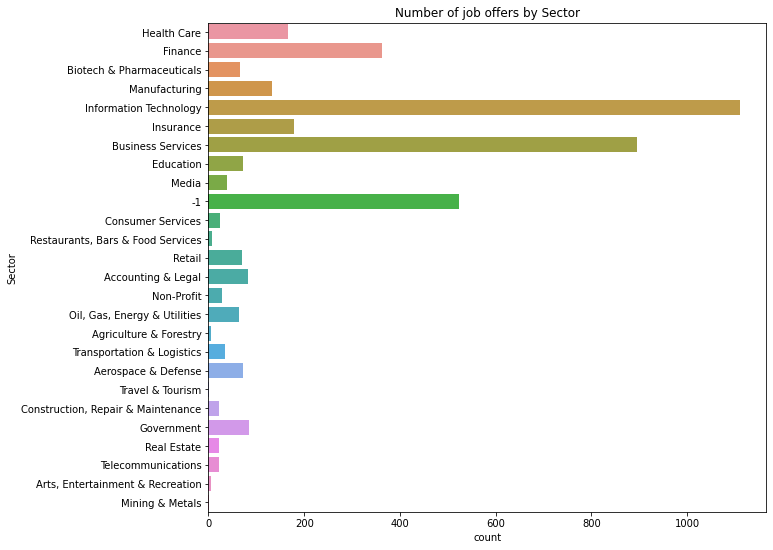

In [12]:
plt.figure(figsize=(10,9))
sns.countplot(y=jobs_data['Sector'],data=jobs_data).set_title("Number of job offers by Sector")

Text(0.5, 1.0, 'Number of job offers by State')

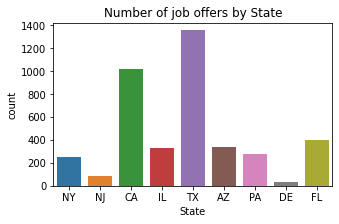

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x=jobs_data['State'],data=jobs_data).set_title("Number of job offers by State")

Text(0, 0.5, 'Organisation Type')

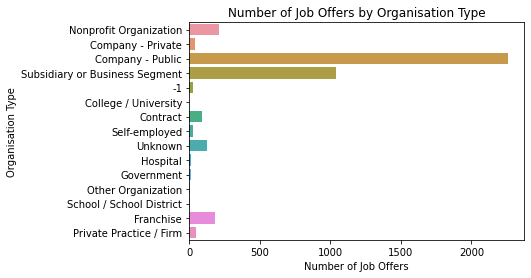

In [14]:
X= jobs_data.groupby('Type of ownership')['Job Title'].count()
Y=jobs_data['Type of ownership'].unique()
sns.barplot(x=X,y=Y).set_title('Number of Job Offers by Organisation Type')
plt.xlabel('Number of Job Offers')
plt.ylabel('Organisation Type')

Text(0.5, 1.0, 'Number of job offers with Rating more than 3')

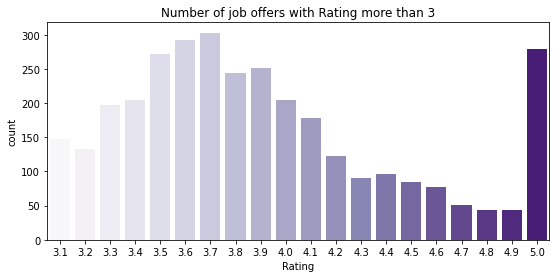

In [15]:
plt.figure(figsize=(9,4))
sns.countplot(x='Rating',data=jobs_data[jobs_data['Rating']>3], palette= 'Purples').set_title("Number of job offers with Rating more than 3")

Text(0.5, 1.0, 'Distribution of Ratings by State')

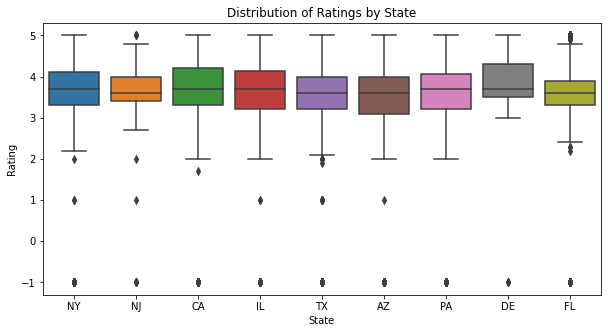

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='State',y='Rating',data=jobs_data).set_title("Distribution of Ratings by State")


## Salary Stats

In [24]:
# Top 5 sectors with the highest Average Salary
jobs_data.groupby('Sector')['Sector','AvgSalary'].mean().sort_values(by='AvgSalary', ascending = False).head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,AvgSalary
Sector,
Media,88013.157895
Real Estate,82659.090909
Consumer Services,81700.000000
Information Technology,79708.558559
"Construction, Repair & Maintenance",79214.285714


Text(0.5, 1.0, 'Distribution of AverageSalary by State')

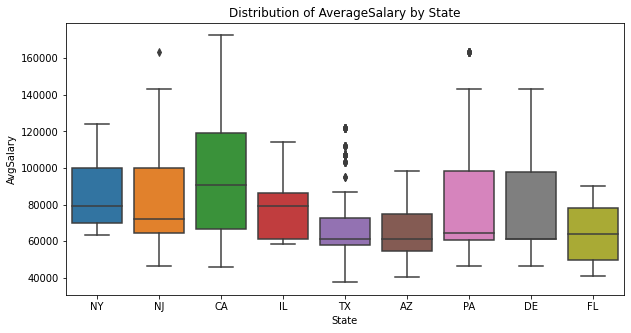

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='State',y='AvgSalary',data=jobs_data).set_title("Distribution of AverageSalary by State")

## Most in-demand skills and type of roles

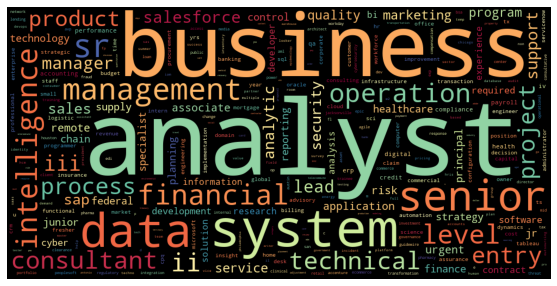

In [18]:
from wordcloud import WordCloud
job_titles = jobs_data['Job Title'].apply(lambda x: x.lower())
job_titles.head()
job_titles.isna().sum()
job_titles.dropna(inplace = True)
cloud =" "
for i in job_titles:
    for j in i.split(r'\w+'):
        cloud+=''.join(j)+' '  
        
word_cloud = WordCloud(height=500,width= 1000,margin=10,max_words=300, 
                       colormap='Spectral',collocations = False, background_color = 'black').generate(cloud)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### The above word cloud makes sense as we are looking at a Business Analyst Jobs dataset, so it is obvious that the words which appear the most in Job Title is "business" and "analyst"

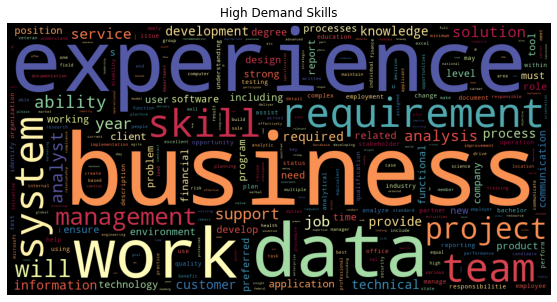

In [20]:
job_desc = jobs_data['Job Description'].apply(lambda x: x.lower())
job_desc.head()
job_desc.isna().sum()
job_desc.dropna(inplace = True)
cloud =" "
for i in job_desc:
    for j in i.split(r'\w+'):
        cloud+=''.join(j)+' '  
        
word_cloud = WordCloud(height=500,width= 1000, margin=10,max_words=300, 
                       colormap='Spectral',collocations = False, background_color = 'black').generate(cloud)

plt.imshow(word_cloud)
plt.axis("off")
plt.title("High Demand Skills")
plt.show()

# Conclusions

### 1. The job description for most positions ask for experience with business, understanding requirements, working with data and leveraging information
### 2. Types of Business Analyst job roles - financial analyst, system analyst, intelligence analyst, risk analyst, quality analyst, security analyst, salesforce analyst so on and so forth. A lot of variety I'd say!
### 3. Next is the number of job offers. It is important to know our chances of getting a job. The field of Information Technology has more job offers. From this we can infer that they have more openings as well. Similary, public organisations have more open positions than any other.
### 4.Salary is an important aspect of job hunting. Media has the highest Average Salary out of all sectors